We will start with some data exploration and some data cleaning

In [2]:
#Installing imblearn
!pip install imblearn

In [3]:
#Importing all the libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import sklearn as sk
import warnings
import re
import plotly.express as px
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [4]:
#Reading the datasets
sh_att = pd.read_csv(r'C:\Users\Samu\Documents\Ironhack\Shark-Attack-Project\files\attacks.csv', encoding='latin1')

In [5]:
#Getting the shape of the datasets
sh_att.shape

(25723, 24)

In [6]:
#Checking the head of the dataset
sh_att.head(5)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [7]:
#Checking the taik of the dataset
sh_att.tail(10)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
25713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25722,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As we can see, there are a ton of NaN rows at the end of the dataset, so we have to take care of them.

In [8]:
#Checking the column types
sh_att.dtypes

Case Number                object
Date                       object
Year                      float64
Type                       object
Country                    object
Area                       object
Location                   object
Activity                   object
Name                       object
Sex                        object
Age                        object
Injury                     object
Fatal (Y/N)                object
Time                       object
Species                    object
Investigator or Source     object
pdf                        object
href formula               object
href                       object
Case Number.1              object
Case Number.2              object
original order            float64
Unnamed: 22                object
Unnamed: 23                object
dtype: object

In [9]:
#Dropping duplicates from the dataset.
sh_att.drop_duplicates(inplace=True)

In [10]:
#Standaraizing the column names
sh_att.columns = sh_att.columns.str.lower().str.replace(" ", "_").str.replace(".", "_").str.replace(":","_")

In [11]:
#Dropping the columns that will not be used
sh_att = sh_att.drop(['date', 'name','area', 'location', 'injury','case_number', 'investigator_or_source','original_order','pdf','href','href_formula','case_number_1','case_number_2', 'unnamed__22', 'unnamed__23'], axis=1)

In [12]:
#Renaming the columns for better understanding and correcting some errors after the standardization
sh_att = sh_att.rename(columns={'fatal_(y/n)':'fatal', 'sex_':'sex', 'species_':'species'})

In [13]:
#Checking the totaln nan values
sh_att.isna().sum()

year          12
type          14
country       60
activity     554
sex          575
age         2841
fatal        549
time        3364
species     2848
dtype: int64

In [14]:
#Creating a copy of the dataset to work with
sh_copy = sh_att.copy()

In [15]:
#Dropping the rows whose all of their values are nans
sh_copy = sh_copy.dropna(how='all')

In [16]:
#Checking how many nans are after dropping the rows
sh_copy.isna().sum()

year           2
type           4
country       50
activity     544
sex          565
age         2831
fatal        539
time        3354
species     2838
dtype: int64

In [17]:
#Getting the new shape
sh_copy.shape

(6302, 9)

We will start the cleaning with the Time column

In [18]:
#Checking the value counts of the column
sh_copy['time'].value_counts()

time
Afternoon      187
11h00          128
Morning        121
12h00          109
15h00          108
              ... 
14h37            1
10h07            1
13h53            1
13h23            1
19h00-20h00      1
Name: count, Length: 366, dtype: int64

In [19]:
#Creating a pattern to standarize the hours and filter the invalid values
pattern = r'^\d{2}:\d{2}$'
invalid_times = sh_copy[~sh_copy['time'].str.contains(pattern, na=False)]
invalid_times['time'].value_counts()

time
Afternoon      187
11h00          128
Morning        121
12h00          109
15h00          108
              ... 
14h37            1
10h07            1
13h53            1
13h23            1
19h00-20h00      1
Name: count, Length: 366, dtype: int64

In [20]:
#Creating a dictionary to replace the invalid times
time_mapping = {  
    '.*noon*.': '12:00', 
    '.*dusk*.': '18:00',
    '.*Dusk*.': '18:00',
    '.*Nig*.' : '22:00',
    '.*ning*.' : '10:00',
    '.*night*.' : '22:00',
    '.*daybreak*.' : '07:00',
    '.*dark*.' : '22:00',
    '.*Daytime*.' : '12:00',
    '.*fall*.' : '19:00',
    '.*lunc*.' : '12:00',
    '.*Midday*.' : '12:00',
    }

In [21]:
#Replacing the letters for the :
if sh_copy is not None:
    sh_copy['time'].replace('h', ':', regex=True, inplace=True)
    sh_copy['time'].replace('j', ':', regex=True, inplace=True)
    sh_copy['time'].replace('t', '', regex=True, inplace=True)

In [22]:
#Applying the standarizing dictionary to the column:
sh_copy['time'] = sh_copy['time'].replace(time_mapping, regex=True)

In [23]:
#Filling the nan values temporarily
sh_copy['time'].fillna(value=0, inplace=True)

In [24]:
#Making it so everything fits the pattern
sh_copy = sh_copy[sh_copy['time'].notna() & sh_copy['time'].str.match(pattern)]

In [25]:
#Making so we only have on clock hours for easier understanding of the graphs:
def convert_to_clock_hour(time):
    pattern = r'^(\d{2}):(\d{2})$'
    match = re.match(pattern, time)
    if match:
        hour = match.group(1)
        return hour + ':00'
    else:
        return time
sh_copy['time'] = sh_copy['time'].apply(convert_to_clock_hour)

In [26]:
#Converting the data into datetime format
sh_copy['time'] = pd.to_datetime(sh_copy['time'], format="%H:%M").dt.hour

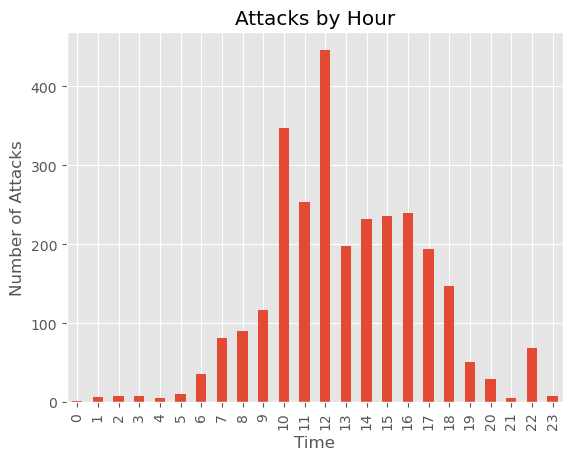

In [27]:
#Plotting to see the distribution of the attacks by hour:
sh_copy['time'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Time')
plt.ylabel('Number of Attacks')
plt.title('Attacks by Hour')
plt.show()

<Axes: xlabel='time', ylabel='Density'>

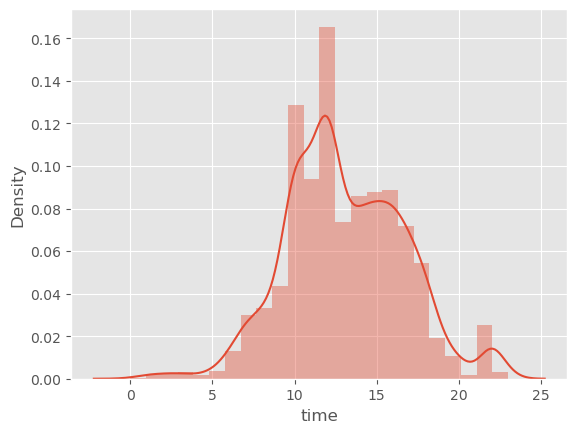

In [28]:
#Plotting in another shape, just to see which one is better
sns.distplot(sh_copy['time'], bins=24)

From what we can see from the graphs, during the morning through midday we have the most attacks, maybe because is the hour that the people is more prone to go swimming. During the night there are almost no attacks, but we can see that during 22:00, we have a peak of attacks, it may be interesting to see why.

We will continue the cleaning with the Type column

In [29]:
#Getting the unique values from the column
sh_copy['type'].unique()

array(['Boating', 'Invalid', 'Unprovoked', 'Provoked', 'Questionable',
       nan, 'Boat', 'Sea Disaster'], dtype=object)

In [30]:
#Getting the count
sh_copy['type'].value_counts()

type
Unprovoked      2355
Provoked         180
Invalid          144
Boating           59
Sea Disaster      40
Boat              32
Questionable       2
Name: count, dtype: int64

In [31]:
#Filling the nan values with the most common value
sh_copy['type'].fillna(value='Unprovoked', inplace=True)

In [32]:
#Reducing the number of categories
sh_copy['type'] = sh_copy['type'].replace({'Boatomg' : 'Boating', 'Questionable' : 'Unprovoked', 'Boat' : 'Boating', 'Invalid' : 'Unprovoked'})

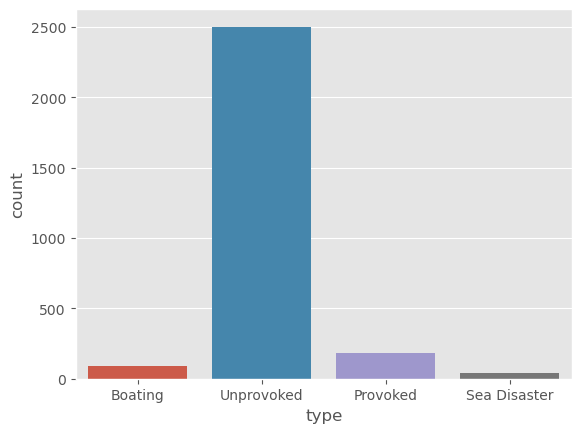

In [33]:
sns.countplot(x='type', data=sh_copy)
plt.show()

As we can see, almost all of the attacks were unprovoked.

For the next part, we will continue with the countries, as it is a ver long column, with a lot of different values.

In [34]:
#Getting all the unique values
sh_copy['country'].unique()

array(['USA', 'BRAZIL', 'AUSTRALIA', 'ENGLAND', 'SOUTH AFRICA',
       'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA', 'CUBA',
       'MAURITIUS', 'NEW ZEALAND', 'SAMOA', 'JAPAN', 'SPAIN',
       'ST HELENA, British overseas territory', 'REUNION',
       'UNITED ARAB EMIRATES', 'MEXICO', 'INDONESIA', 'COLUMBIA', 'EGYPT',
       'FRENCH POLYNESIA', 'Fiji', 'DOMINICAN REPUBLIC', 'ECUADOR',
       'MOZAMBIQUE', 'THAILAND', 'PUERTO RICO', 'FRANCE',
       'PAPUA NEW GUINEA', 'ISRAEL', 'PALESTINIAN TERRITORIES', 'JAMAICA',
       'ITALY', 'ANTIGUA', 'RUSSIA', 'SEYCHELLES', 'TURKS & CAICOS',
       'FIJI', 'TONGA', 'SOUTH KOREA', 'VIETNAM', 'MADAGASCAR', 'GUAM',
       'UNITED ARAB EMIRATES (UAE)', 'PANAMA', 'SCOTLAND',
       'UNITED KINGDOM', 'TAIWAN', 'CROATIA', 'PHILIPPINES',
       'SOLOMON ISLANDS', 'YEMEN', 'ATLANTIC OCEAN', 'ST. MAARTIN',
       'GRAND CAYMAN', 'VANUATU', 'MEXICO ', 'VENEZUELA', 'MICRONESIA',
       'OKINAWA', 'MARSHALL ISLANDS', 'EGYPT / ISRAEL', 'HONG KONG',


In [35]:
#Checking the value counts
sh_copy['country'].value_counts()

country
USA                    1328
AUSTRALIA               573
SOUTH AFRICA            333
BAHAMAS                  48
NEW ZEALAND              46
                       ... 
PERSIAN GULF              1
NORTH PACIFIC OCEAN       1
NICARAGUA                 1
AMERICAN SAMOA            1
RED SEA?                  1
Name: count, Length: 114, dtype: int64

In [36]:
#Fillin the nan values with the most common value
sh_copy['country'].fillna(value='USA', inplace=True)

In [37]:
#Dealing with duplicated values with different names and erratas
sh_copy['country'] = sh_copy['country'].replace({'Fiji' : 'FIJI',
                                                'ST HELENA, British overseas territory' : 'ST HELENA',
                                                 'UNITED ARAB EMIRATES (UAE)' : 'UNITED ARAB EMIRATES', 
                                                 'PALESTINIAN TERRITORIES' : 'PALESTINE',
                                                 'SCOTLAND' : 'UNITED KINGDOM', 
                                                 'OKINAWA' : 'JAPAN', 
                                                 'EGYPT / ISRAEL' : 'EGYPT',
                                                 'EGYPT ' : 'EGYPT', 
                                                 'FEDERATED STATES OF MICRONESIA' : 'MICRONESIA', 
                                                 'ANDAMAN / NICOBAR ISLANDAS' : 'ANDAMAN ISLANDS', 
                                                 'BRITISH WEST INDIES' : 'TURKS & CAICOS',
                                                 'ENGLAND' : 'UNITED KINGDOM',
                                                 'MEXICO ' : 'MEXICO',
                                                 'PERSIAN GULF' : 'IRAN',
                                                 'AMERICAN SAMOA' : 'SAMOA',
                                                 'JOHNSTON ISLAND' : 'USA',
                                                 'NICARAGUA ' : 'NICARAGUA',
                                                 'THE BALKANS' : 'CROATIA',
                                                 'YEMEN ' : 'YEMEN',
                                                 })

In [38]:
#Checking that everything is ok
sh_copy['country'].unique()

array(['USA', 'BRAZIL', 'AUSTRALIA', 'UNITED KINGDOM', 'SOUTH AFRICA',
       'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA', 'CUBA',
       'MAURITIUS', 'NEW ZEALAND', 'SAMOA', 'JAPAN', 'SPAIN', 'ST HELENA',
       'REUNION', 'UNITED ARAB EMIRATES', 'MEXICO', 'INDONESIA',
       'COLUMBIA', 'EGYPT', 'FRENCH POLYNESIA', 'FIJI',
       'DOMINICAN REPUBLIC', 'ECUADOR', 'MOZAMBIQUE', 'THAILAND',
       'PUERTO RICO', 'FRANCE', 'PAPUA NEW GUINEA', 'ISRAEL', 'PALESTINE',
       'JAMAICA', 'ITALY', 'ANTIGUA', 'RUSSIA', 'SEYCHELLES',
       'TURKS & CAICOS', 'TONGA', 'SOUTH KOREA', 'VIETNAM', 'MADAGASCAR',
       'GUAM', 'PANAMA', 'TAIWAN', 'CROATIA', 'PHILIPPINES',
       'SOLOMON ISLANDS', 'YEMEN', 'ATLANTIC OCEAN', 'ST. MAARTIN',
       'GRAND CAYMAN', 'VANUATU', 'VENEZUELA', 'MICRONESIA',
       'MARSHALL ISLANDS', 'HONG KONG', 'CHILE', 'GREECE', 'GRENADA',
       'IRAQ', 'MALAYSIA', 'BERMUDA', 'SENEGAL', 'TURKEY', 'SINGAPORE',
       'NEW BRITAIN', 'PACIFIC OCEAN ', 'SOUTH PACIFIC 

In [39]:
#Dropping the few rows that have Ocean or Sea as a descriptor, as it is not exact enough to link it to a country
sh_copy = sh_copy[~sh_copy['country'].str.contains('OCEAN|SEA', case=False)]

In [40]:
#Abbrebiating the countries names so they are easier to read in a plot (really long dictionary, sorry, didn't find a better way to do it)
sh_copy['country'] = sh_copy['country'].replace({'BRAZIL' : 'BRZ',
                                                 'AUSTRALIA' : 'AUS',
                                                 'UNITED KINGDOM' : 'UK',
                                                 'SOUTH AFRICA' : 'SA',
                                                 'COSTA RICA' : 'CR',
                                                 'MALDIVES' : 'MAL',
                                                 'BAHAMAS' : 'BAH',
                                                 'NEW CALEDONIA' : 'NC',
                                                 'CUBA' : 'CUB',
                                                 'MAURITIUS' : 'MAU',
                                                 'NEW ZEALAND' : 'NZ',
                                                 'SAMOA' : 'SAM',
                                                 'JAPAN': 'JP',
                                                 'SPAIN' : 'ESP',
                                                 'ST HELENA' : 'STH',
                                                 'REUNION' : 'REU',
                                                 'UNITED ARAB EMIRATES' : 'UAE',
                                                 'MEXICO' : 'MEX',
                                                 'INDONESIA' : 'INDO',
                                                 'COLUMBIA' : 'COL',
                                                 'EGYPT' : 'EGY',
                                                 'FRENCH POLYNESIA' : 'FP',
                                                 'DOMINICAN REPUBLIC' : 'DR',
                                                 'ECUADOR' : 'ECU',
                                                 'MOZAMBIQUE' : 'MOZ',
                                                 'THAILAND' : 'THAI',
                                                 'PUERTO RICO' : 'PR',
                                                 'FRANCE' : 'FR',
                                                 'PAPUA NEW GUINEA' : 'PNG',
                                                 'ISRAEL' : 'ISR',
                                                 'PALESTINE' : 'PAL',
                                                 'JAMAICA' : 'JAM',
                                                 'ITALY' : 'IT',
                                                 'ANTIGUA' : 'ANT',
                                                 'RUSSIA' : 'RUS',
                                                 'SEYCHELLES' : 'SEY',
                                                 'TURKS & CAICOS' : 'TC',
                                                 'TONGA' : 'TONG',
                                                 'SOUTH KOREA' : 'SK',
                                                 'VIETNAM' : 'VN',
                                                 'MADAGASCAR' : 'MAD',
                                                 'GUAM' : 'GU',
                                                 'PANAMA' : 'PAN',
                                                 'TAIWAN' : 'TW',
                                                 'CROATIA' : 'CRO',
                                                 'PHILIPPINES' : 'PHI',
                                                 'SOLOMON ISLANDS' : 'SI',
                                                 'YEMEN' : 'YEM',
                                                 'ST. MAARTIN' : 'STM',
                                                 'GRAND CAYMAN' : 'GC',
                                                 'VANUATU' : 'VAN',
                                                 'VENEZUELA' : 'VEN',
                                                 'MICRONESIA' : 'MIC',
                                                 'MARSHALL ISLANDS' : 'MI',
                                                 'HONG KONG' : 'HK',
                                                 'CHILE' : 'CHI',
                                                 'GREECE' : 'GR',
                                                 'GRENADA' : 'GRE',
                                                 'IRAQ' : 'IRQ',
                                                 'MALAYSIA' : 'MAL',
                                                 'BERMUDA' : 'BER',
                                                 'SENEGAL' : 'SEN',
                                                 'TURKEY' : 'TUR',
                                                 'SINGAPORE' : 'SIN',
                                                 'NEW BRITAIN' : 'NB',
                                                 'JOHNSON ISLAND' : 'JI',
                                                 'PALAU' : 'PAL',
                                                 'TANZAIA' : 'TAN',
                                                 'NICARAGUA' : 'NIC',
                                                 'ANDAMAN ISLANDS' : 'AND',
                                                 'TANZANIA' : 'TAN',
                                                 'IRAN' : 'IRN',
                                                 'ARGENTINA' : 'ARG',
                                                 'EL SALVADOR' : 'ES',
                                                 'JAVA' : 'JAV',
                                                 'INDIA' : 'IND',
                                                 'GUYANA' : 'GUY',
                                                 'IRELAND' : 'IRL',
                                                 'MONTENEGRO' : 'MONT',
                                                 'YEMEN' : 'YEM',
                                                 'SRI LANKA' : 'SL',
                                                 'PARAGUAY' : 'PAR',
                                                 'CANADA' : 'CAN',
                                                 'TUVALU' : 'TUV',
                                                 'GUINEA' : 'GUI',
                                                 'MARTINIQUE' : 'MAR',
                                                 'BARBADOS' : 'BAR',
                                                })

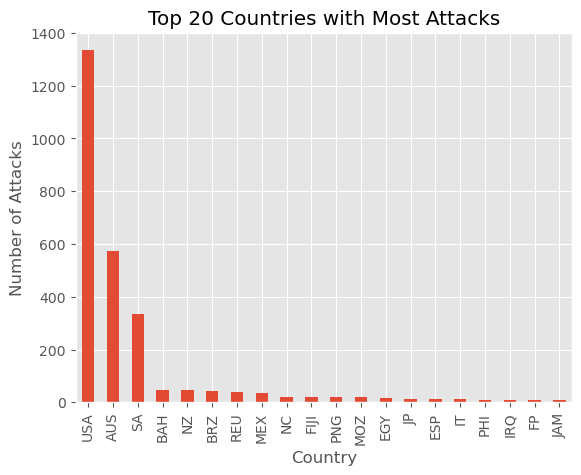

In [41]:
#Plotting the top 20 countries with most attacks
sh_copy['country'].value_counts().sort_values(ascending=False).head(20).plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Number of Attacks')
plt.title('Top 20 Countries with Most Attacks')
plt.show()

As we can see, USA gets the prize here by a long run, with the rest of countries only having some attacks. 

We will continue with the Sex column.

In [42]:
#Getting the value counts of the column
sh_copy['sex'].value_counts()

sex
M      2325
F       372
M         1
lli       1
Name: count, dtype: int64

In [43]:
#Filling the nan values with the most common value
sh_copy['sex'].fillna(value='M', inplace=True)

In [44]:
#Replacing the non standard values with the correct ones
sh_copy['sex'] = sh_copy['sex'].replace(['N', 'M ', 'lli', '.'], 'M')

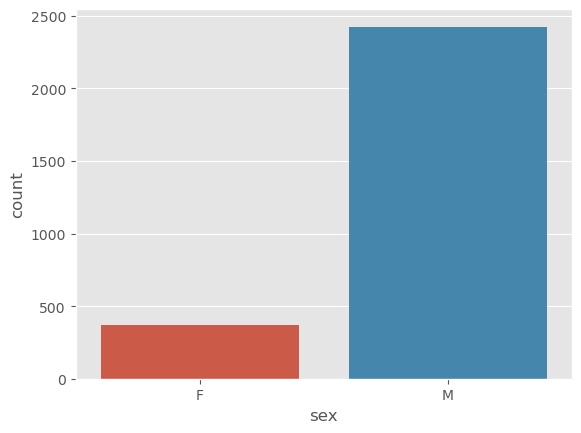

In [45]:
sns.countplot(x='sex', data=sh_copy)
plt.show()

From the data, we get that more men are attacked than women, but we don't know if it is something that the sharks take in consideration.

Next, we start working with the age.

In [46]:
#Getting the value counts of the column
sh_copy['age'].value_counts()

age
18          104
19          103
17           94
15           89
16           89
           ... 
              1
6½            1
33 or 37      1
mid-30s       1
13 or 14      1
Name: count, Length: 108, dtype: int64

In [47]:
#Getting the unique values
sh_copy['age'].unique()

array(['57', '48', '18', '15', '12', '32', '10', '21', nan, '30', '60',
       '33', '37', '19', '25', '69', '55', '34', '35', '40s', '20', '54',
       '14', '22', '31', '17', '40', '28', '42', '3', '11', '13', '50',
       '46', '82', '41', '20s', '51', '39', '58', '26', 'Teen', '47',
       '16', '61', '65', '73', '36', '66', '29', '43', '60s', '49', '59',
       '6', '27', '64', '23', '52', '24', '45', '71', '9', '44', '7',
       '62', '38', '68', '63', '70', '53', '8', 'teen', '77', '74', '56',
       '30s', '5', '86', '18 or 20', '12 or 13', '36 & 26', '8 or 10',
       '84', '\xa0 ', ' ', '6½', '33 or 37', 'mid-30s', ' 30', ' 28',
       '20?', "60's", '67', '21 or 26', '20 ', '>50', '9 & 12', '? & 19',
       '(adult)', '25 or 28', '30 & 32', '13 or 18', '33 & 26',
       'MAKE LINE GREEN', '9 or 10', '  ', '31 or 33', '13 or 14'],
      dtype=object)

In [48]:
#Starting the cleaning process, by removing the s at the end of the numbers and getting rid of the dual ages.
sh_copy['age'] = sh_copy['age'].str.split().str[0]
sh_copy['age'] = sh_copy['age'].str.split().str[0].str.replace('s','')

In [49]:
#Correcting the rest of the values
sh_copy['age'] = sh_copy['age'].replace({
                                        'Teen' : '15',
                                         'teen' : '15',
                                         '\xa0' : '18',
                                         ' ' : '18',
                                         '6½' : '6',
                                         'mid-30' : '35',
                                         '20?' : '20',
                                         "60'" : '60',
                                         '>50' : '50',
                                         '?' : '18',
                                         '(adult)' : '30',
                                         'MAKE' : '18',


})

In [50]:
#Filling the nan values with the more common value
sh_copy['age'].fillna(value='18', inplace=True)

<Axes: xlabel='age', ylabel='Density'>

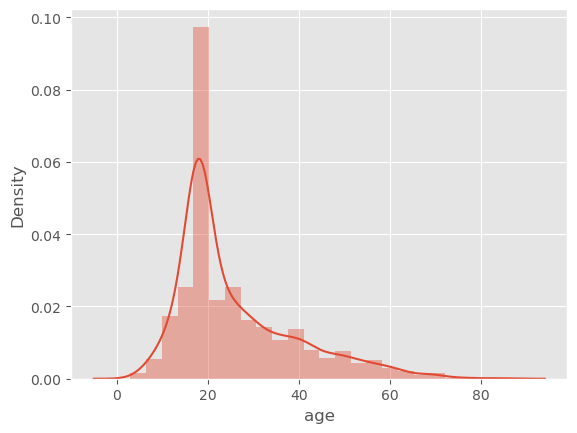

In [51]:
#Plotting to see the data
sns.distplot(sh_copy['age'], bins=24)

From the graph, we can see that the most attacks were performed on people around the age 18 to 20.

Next, we tackle the fatal column

In [52]:
#Getting the value counts of the column
sh_copy['fatal'].value_counts()

fatal
N          2192
Y           459
UNKNOWN       4
 N            3
M             1
2017          1
Name: count, dtype: int64

In [53]:
#Filling the nan values with the most common value
sh_copy['fatal'].fillna(value='N', inplace=True)

In [54]:
#Getting rid of the invalid values
sh_copy['fatal'] = sh_copy['fatal'].replace({'M' : 'N',
                                             'UNKNOWN' : 'N',
                                             ' N' : 'N',
                                             '2017' : 'N',})

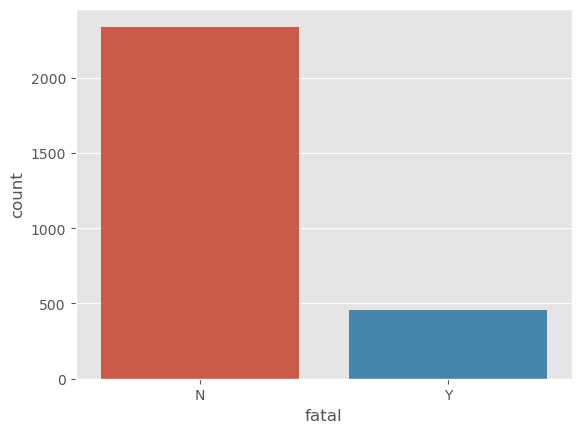

In [55]:
#Plotting the column
sns.countplot(x='fatal', data=sh_copy)
plt.show()

As we can see from the graph, most of the attacks were non fatal and the person survived it.

Next, we will tackle the year column

In [56]:
#Checking the value counts of the column
sh_copy['year'].value_counts()

year
2015.0    105
2017.0     97
2012.0     91
2016.0     89
2011.0     86
         ... 
1890.0      1
1894.0      1
1909.0      1
1918.0      1
1892.0      1
Name: count, Length: 157, dtype: int64

In [57]:
#Checking the unique values
sh_copy['year'].unique()

array([2018., 2017., 2016., 2015., 2014., 2013., 2012., 2011., 2010.,
       2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002., 2001.,
       2000., 1999., 1998., 1997., 1996., 1995., 1984., 1994., 1993.,
       1992., 1991., 1990., 1989., 1988., 1987., 1986., 1985., 1983.,
       1982., 1981., 1980., 1979., 1978., 1977., 1976., 1975., 1974.,
       1973., 1972., 1971., 1970., 1969., 1968., 1967., 1966., 1965.,
       1964., 1963., 1962., 1961., 1960., 1959., 1958., 1957., 1956.,
       1955., 1954., 1953., 1952., 1951., 1950., 1949., 1948., 1947.,
       1946., 1945., 1944., 1943., 1942., 1941., 1940., 1939., 1938.,
       1937., 1936., 1935., 1934., 1933., 1932., 1931., 1930., 1929.,
       1928., 1927., 1926., 1925., 1924., 1923., 1922., 1921., 1920.,
       1919., 1918., 1917., 1916., 1914., 1912., 1911., 1910., 1909.,
       1907., 1906., 1905., 1902., 1901., 1900., 1899., 1898., 1897.,
       1896., 1895., 1894., 1893., 1892., 1891., 1890., 1889., 1888.,
       1887., 1886.,

In [58]:
#Cleaning the column of the dots
sh_copy['year'] = sh_copy['year'].astype(str).str.split('.').str[0]

In [59]:
#Checking the rows with values 0
print(sh_copy['year'].value_counts()['0'])
sh_copy[sh_copy['year'] == '0']

6


,year,type,country,activity,sex,age,fatal,time,species
6200,0,Unprovoked,USA,Shark tagging,F,21,N,18,"Blacktip shark, 5'"
6241,0,Unprovoked,IRQ,Fishing from a small boat & put his hand in th...,M,25,N,12,NaN
6242,0,Unprovoked,IRQ,Swimming naked near a date palm where many dat...,M,6,N,12,Bull shark
6243,0,Unprovoked,IRQ,Swimming in section of river used for washing ...,M,16,N,12,Bull shark
6259,0,Sea Disaster,USA,A group of survivors on a raft for 17-days,M,18,Y,12,1.2 m [4'] shark
6265,0,Unprovoked,IRQ,Swimming,M,13,Y,12,Bull shark


In [60]:
#Correcting the values using the info from the date column
sh_copy.loc[6200, 'year'] = '2008'
sh_copy.loc[6241, 'year'] = '1960'
sh_copy.loc[6242, 'year'] = '1960'
sh_copy.loc[6243, 'year'] = '1960'
sh_copy.loc[6259, 'year'] = '1943'
sh_copy.loc[6265, 'year'] = '1942'

In [61]:
#Converting the values to datetime format
sh_copy['year'] = pd.to_datetime(sh_copy['year'], format="%Y").dt.year

<Axes: xlabel='year', ylabel='Density'>

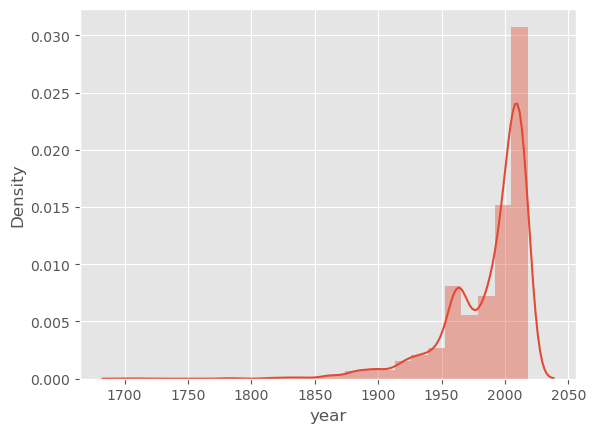

In [62]:
#Plotting the column
sns.distplot(sh_copy['year'], bins=24)

As we can see from the plot, most of the attacks were made during the 2000s and 2010s, maybe it can be linked to more data collected during the most recent years.

For the next part, we will tackle the Activity column.

In [63]:
#Getting the value counts of the column
sh_copy['activity'].value_counts()

activity
Surfing                                                          724
Swimming                                                         428
Spearfishing                                                     157
Fishing                                                          109
Wading                                                           104
                                                                ... 
Hookah diving for pen shells                                       1
Preparing to fish for jack-mackerel                                1
Fell from cliff while fishing & disappeared in strong current      1
Kneeling in the water                                              1
A group of survivors on a raft for 17-days                         1
Name: count, Length: 583, dtype: int64

In [64]:
#Getting the unique values
sh_copy['activity'].unique()

array(['Paddling', 'Surfing', 'Swimming', 'Walking', 'Standing',
       'Feeding sharks', 'Fishing', 'Scuba diving', 'Paddle-skiing',
       'Windsurfing', 'Stand-Up Paddleboarding', 'Wading',
       'Kayak fishing for sharks', nan, 'Spearfishing', 'Diving',
       'Night bathing', 'Surfing ', 'Kayaking / Fishing', 'Kayaking',
       'Snorkeling', 'Scuba Diving', 'Swimming, poaching abalone', 'SUP',
       'Skimboarding', 'Body boarding', 'Paddle boarding', 'Kakaying',
       'Grabbing shark for a selfie', 'Surf skiing ', 'Free diving',
       'Surf fishing', 'Floating', 'Surfng', 'Kite surfing',
       'Boogie boarding', 'SUP Foil boarding', 'Floating in tube',
       'Teasing a shark', 'Surf-skiing', 'Body surfing',
       'Diving for beche-de-mer', 'Kayak Fishing', 'Swimming / Wading',
       'Photographing fish', 'Scallop diving on hookah', 'Body boarding ',
       'Playing in the water', 'Body Boarding', 'Body surfing?',
       'Playing', 'Standing / Snorkeling', 'Hand feeding sha

In [65]:
#Creating a dictionary to replace the values (again, sorry for the long dictionary)
rule_replace = {'(?i).*Swimming.*' : 'Swimming',
                '(?i).*swim.*' : 'Swimming',
                '(?i).*Fishing.*' : 'Fishing',
                '(?i).*fish.*' : 'Fishing',
                '(?i).*Surfing.*' : 'Surfing',
                '(?i).*Bathing.*' : 'Swimming',
                '(?i).*Diving.*' : 'Diving',
                '(?i).*Standing.*' : 'Standing',
                '(?i).*Snorkeling.*' : 'Diving',
                '(?i).*Wading.*' : 'Wading',
                '(?i).*Scuba.*' : 'Diving',
                '(?i).*Body.*' : 'Surfing',
                '(?i).*Kayaking.*' : 'Kayaking',
                '(?i).*Windsurfing.*' : 'Surfing',
                '(?i).*Paddle.*' : 'Surfing',
                '(?i).*Floating.*' : 'Swimming',
                '(?i).*Rowing.*' : 'Sailing',
                '(?i).*Canoeing.*' : 'Sailing',
                '(?i).*Boogie.*' : 'Surfing',
                '(?i).*Sailing.*' : 'Sailing',
                '(?i).*Fell.*' : 'Swimming',
                '(?i).*Walking.*' : 'Walking',
                '(?i).*Boating.*' : 'Sailing',
                '(?i).*surf.*' : 'Surfing',
                '(?i).*SUP.*' : 'Surfing',
                '(?i).*Fell.*' : 'Swimming',
                '(?i).*Freediving.*' : 'Diving',
                '(?i).*boardin.*' : 'Surfing',
                '(?i).*snorkeling.*' : 'Diving',
                '(?i).*cast.*' : 'Fishing',
                '(?i).*cleaning.*' : 'Fishing',
                '(?i).*disaster.*' : 'Swimming',
                '(?i).*ski.*' : 'Surfing',
                '(?i).*shark.*' : 'Messing with Sharks',
                '(?i).*water.*' : 'Swimming',
                '(?i).*playing.*' : 'Playing',
                '(?i).*dive.*' : 'Diving',
                '(?i).*float.*' : 'Swimming',
                '(?i).*clean.*' : 'Shore Activity',
                '(?i).*spear.*' : 'Fishing',
                '(?i).*sink.*' : 'Swimming',
                '(?i).*sank.*' : 'Swimming',
                '(?i).*sunk.*' : 'Swimming',
                '(?i).*wreck.*' : 'Swimming',
                '(?i).*crash.*' : 'Swimming',
                '(?i).*aircraft.*' : 'Swimming',
                '(?i).*waves.*' : 'Shore Activity',
                '(?i).*sea.*' : 'Swimming',
                '(?i).*raft.*' : 'Swimming',
                '(?i).*towing.*' : 'Swimming',
                '(?i).*air.*' : 'Swimming',
                '(?i).*wash.*' : 'Shore Activity',
                '(?i).*collect.*' : 'Fishing',
                '(?i).*boat.*' : 'Sailing',
                '(?i)Pulling.*' : 'Fishing',
                '(?i).*net.*' : 'Fishing',
                '(?i).*Beach.*' : 'Shore Activity',
                '(?i).*founder.*' : 'Sailing',
                '(?i).*hunt.*' : 'Fishing',
                '(?i).*overboard.*' : 'Swimming',
                '(?i).*ship.*' : 'Sailing',
                '(?i).*river.*' : 'Swimming',
                'pêcheur de bichiques' : 'Fishing',
                'Kakaying' : 'Kayaking',
                '(?i).*cross.*' : 'Swimming',
                '(?i).*swell.*' : 'Swimming',
                'Splashing' : 'Shore Activity',
                '(?i).*reach.*' : 'Swimming',
                '(?i).*submarine.*' : 'Swimming',
                }

In [66]:
#Apllying the dictionary to the column
sh_copy['activity'] = sh_copy['activity'].replace(rule_replace, regex=True)

In [67]:
#Getting the new uniques to check if everything is ok
sh_copy['activity'].unique()

array(['Paddling', 'Surfing', 'Swimming', 'Walking', 'Standing',
       'Messing with Sharks', 'Fishing', 'Diving', 'Wading', nan,
       'Kayaking', 'Playing', 'Sailing', 'Shore Activity', 'Rescuing',
       'Paddling on kneeboard', 'Crawling', 'Crabbing', 'Jumping',
       'Murder', 'Shrimping', 'Lifesaving drill', 'Sitting in shallows',
       'Clamming', 'Escaping from Alacatraz', 'Shore Activity ',
       'Lifesaving exhibition'], dtype=object)

In [68]:
#Getting the new value counts
sh_copy['activity'].value_counts()

activity
Surfing                    1001
Swimming                    722
Fishing                     430
Diving                      241
Wading                      114
Standing                     84
Messing with Sharks          32
Kayaking                     28
Sailing                      23
Walking                      19
Shore Activity                8
Playing                       7
Lifesaving drill              4
Jumping                       3
Clamming                      2
Paddling                      2
Escaping from Alacatraz       2
Shore Activity                2
Sitting in shallows           1
Rescuing                      1
Shrimping                     1
Murder                        1
Crabbing                      1
Crawling                      1
Paddling on kneeboard         1
Lifesaving exhibition         1
Name: count, dtype: int64

In [69]:
#Filling the nan values with the most common value
sh_copy['activity'].fillna(value='Surfing', inplace=True)

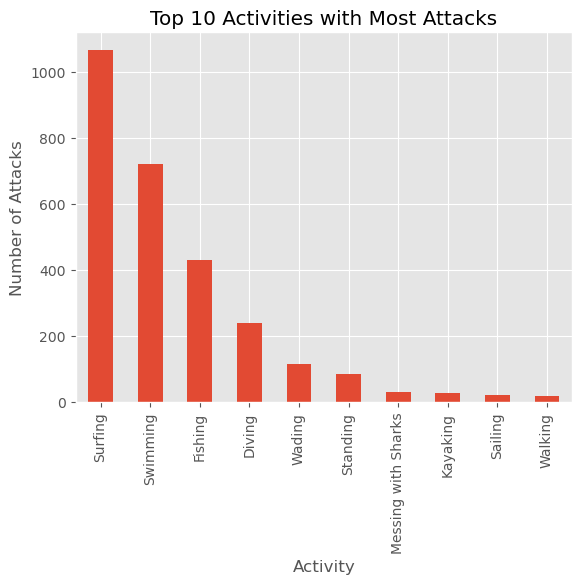

In [70]:
#Plotting the top 10 activities with most attacks
sh_copy['activity'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')
plt.xlabel('Activity')
plt.ylabel('Number of Attacks')
plt.title('Top 10 Activities with Most Attacks')
plt.style.use('seaborn-deep')
plt.show()

From the plot, we can see that the two most common activities that suffer attacks are surfing and swimming, followed by fishing. Something easy to understand as it represents being in the water and moving the way that the sharks seem to relationate to easy prey.

We will tackle the species column next

In [71]:
#Getting the value counts of the column
sh_copy['species'].value_counts()

species
White shark                                         97
Shark involvement not confirmed                     43
Tiger shark                                         37
4' shark                                            35
Bull shark                                          35
                                                    ..
Bronze whaler shark, 4.3 m [14']                     1
Tiger shark, 2.4 m [8']                              1
Bronze whaler shark, 2 m to 3 m [6.75' to 10']       1
4.5 m & 5 m white shark                              1
White sharks                                         1
Name: count, Length: 958, dtype: int64

In [72]:
#Getting the unique values
sh_copy['species'].unique()

array(['White shark', nan, 'Tiger shark', "Bull shark, 6'",
       'Grey reef shark', 'Invalid incident',
       'Shark involvement not confirmed', 'Questionable', '3 m shark',
       'White shark, 3.5 m', 'White shark, 2.5 m', '2 m shark',
       'Bull shark', "Tiger shark, 12'", 'Wobbegong shark', '3.5 m shark',
       '1.8 m shark', 'Juvenile white shark,  2.7 to 3.2 m',
       'Bull shark, 2 m', 'Possibly a wobbegong', 'Bull shark, 3 m ',
       'Grey reef shark. 2 m', 'small shark', 'White shark, 4.6 m',
       'Wobbegong shark, 1 m', 'White shark, 4.5 m',
       'Spinner shark, 4 to 5 feet', 'Tiger shark, 8 to 10 feet',
       "8' shark", "5' shark", "4' to 5' shark", "5' to 6' shark",
       'White shark, 3 to 3.5m ', 'White shark, 3 m',
       'Shark involvement questionable', "White shark, 5' to 7'",
       'Possibly a juvenile blacktip shark', "4' shark",
       "White shark, 10'", 'A small shark', "Blue shark 6'",
       '"A small shark"', "White shark, 11' to 13'",
       "

In [73]:
#Preparing the dictionary for the bulk replacement, I have opted to name all the sharks with no specific species as 'Unkown Shark'
shark_replace = {'(?i).*white.*' : 'White Shark',
                 '(?i).*tiger.*' : 'Tiger Shark',
                 '(?i).*bull.*' : 'Bull Shark',
                 '(?i).*nurse.*' : 'Nurse Shark',
                 '(?i).*blacktip.*' : 'Blacktip Shark',
                 '(?i).*Wobbegong.*' : 'Wobbegong Shark',
                 '(?i).*raggedtooth.*' : 'Raggedtooth Shark',
                 '(?i).*reef.*' : 'Reef Shark',
                  '(?i).*blue.*' : 'Blue Shark',
                  '(?i).*mako.*' : 'Mako Shark',
                  '(?i).*lemon.*' : 'Lemon Shark',
                  '(?i).*sand.*' : 'Sand Shark',
                  '(?i).*spinner.*' : 'Spinner Shark',
                  '(?i).*hammerhead.*' : 'Hammerhead Shark',
                  '(?i).*whaler.*' : 'Whaler Shark',
                  '(?i).*grey.*' : 'Grey Shark',
                  '(?i).*zambesi.*' : 'Zambesi Shark',
                  '(?i).*carpet.*' : 'Carpet Shark',
                  '(?i).*dogfish.*' : 'Dogfish Shark',
                  '(?i).*basking.*' : 'Basking Shark',
                  '(?i).*goblin.*' : 'Goblin Shark',
                  '(?i).*broadnose.*' : 'Broadnose Shark',
                  '(?i).*questionable.*' : 'Unknown Shark',
                  '(?i).*invalid.*' : 'Unknown Shark',
                  '(?i).*unidentified.*' : 'Unknown Shark',
                  '\xa0' : 'Unknown Shark',
                  '(?i).*small.*' : 'Unknown Shark',
                  '(?i).*authentic.*' : 'Unknown Shark',
                  '(?i).*juvenile.*' : 'Unknown Shark',
}


In [74]:
#Applying the dictionary to the column
sh_copy['species'] = sh_copy['species'].replace(shark_replace, regex=True)

In [75]:
#Filling the nan values with Unknown Shark
sh_copy['species'].fillna(value = 'Unknown Shark', inplace=True)

In [76]:
#Getting rid of all the long shark descriptions
sh_copy['species'] = sh_copy['species'].apply(lambda x: 'Unknown Shark' if re.search(r'\d', x) or len(x.split()) >= 3 else x)

In [77]:
#Checking if there are still values to be cleaned
sh_copy['species'].unique()

array(['White Shark', 'Unknown Shark', 'Tiger Shark', 'Bull Shark',
       'Reef Shark', 'Wobbegong Shark', 'Spinner Shark', 'Blacktip Shark',
       'Blue Shark', 'Seven-gill shark', 'Lemon Shark', 'Broadnose Shark',
       'Dogfish Shark', 'Nurse Shark', 'Mako Shark', 'Whaler Shark',
       'Galapagos shark', 'Hammerhead Shark', 'Raggedtooth Shark',
       'Sand Shark', 'Salmon shark', 'Zambesi Shark', 'Angel shark',
       'Thresher shark', 'Spurdog', ' ', 'Grey Shark', 'Unknown Shark ',
       'Copper shark', 'Unknown'], dtype=object)

In [78]:
#Locating the rows with the value ' '
sh_copy[sh_copy['species'] == ' ']

,year,type,country,activity,sex,age,fatal,time,species
1348,2007,Unprovoked,USA,Swimming,F,15,N,17,
1357,2007,Unprovoked,USA,Diving,M,36,N,15,
1454,2006,Unprovoked,USA,Surfing,M,14,N,13,


In [79]:
#fixing the values
sh_copy.loc[1348, 'species'] = 'Unknown Shark'
sh_copy.loc[1357, 'species'] = 'Unknown Shark'
sh_copy.loc[1454, 'species'] = 'Unknown Shark'

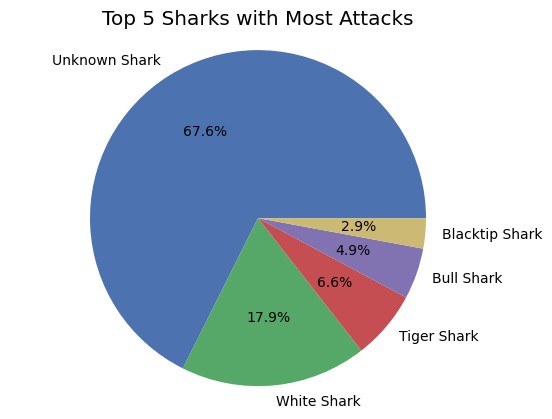

In [80]:
#Plottin the top 5 sharks with most attacks
species_counts = sh_copy['species'].value_counts().head(5)
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%')
plt.title('Top 5 Sharks with Most Attacks')
plt.axis('equal')
plt.show()


From the graph, we can see that in most of the attacks, we don't know the species, for what we know, white sharks are the ones that attacked the most, followed by a great margin by the tiger sharks.

In [81]:
#Checking the dataset after the cleaning
sh_copy.head(10)

,year,type,country,activity,sex,age,fatal,time,species
0,2018,Boating,USA,Paddling,F,57,N,18,White Shark
2,2018,Unprovoked,USA,Surfing,M,48,N,7,Unknown Shark
6,2018,Unprovoked,BRZ,Swimming,M,18,Y,12,Tiger Shark
8,2018,Unprovoked,USA,Walking,M,15,N,17,Bull Shark
9,2018,Unprovoked,USA,Standing,M,12,N,14,Unknown Shark
10,2018,Provoked,AUS,Messing with Sharks,M,32,N,10,Reef Shark
12,2018,Unprovoked,USA,Swimming,M,10,N,15,Unknown Shark
13,2018,Unprovoked,UK,Fishing,M,21,N,8,Unknown Shark
15,2018,Unprovoked,SA,Surfing,M,18,N,11,Unknown Shark
16,2018,Unprovoked,AUS,Surfing,M,18,N,10,Unknown Shark


In [82]:
#Saving the dataset and reseting the index
shark_final = sh_copy.reset_index(drop=True)

In [83]:
#Saving the dataset to a csv file
shark_final.to_csv(r'C:\Users\Samu\Documents\Ironhack\Shark-Attack-Project\files\shark_final.csv', index=False)

We will now check some insights from the dataset and try to answer some questions:

Which is the species that has perpetrated the most fatal attacks?

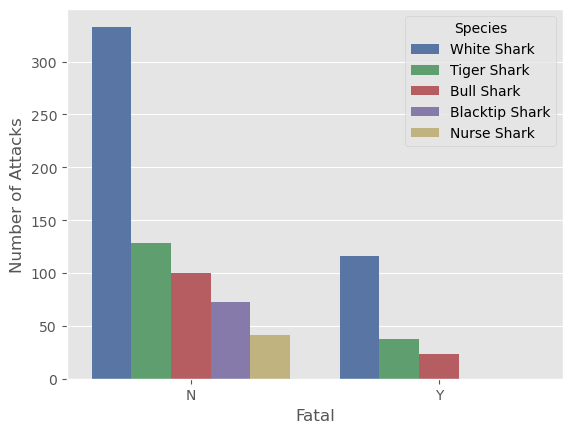

In [84]:
# Plotting to see which species have the most fatal attacks
top_species = shark_final[shark_final['species'] != 'Unknown Shark']['species'].value_counts().head(5).index
sns.countplot(x='fatal', hue='species', data=shark_final[shark_final['species'].isin(top_species)])
plt.xlabel('Fatal')
plt.ylabel('Number of Attacks')
plt.legend(title='Species')
plt.show()


AS we can see, the White Shark is the most dangerous species by a margin. I have left out all the unknown species so we can be specific with the species that we know for sure.

Which sex is the one that suffered the most fatal attacks?

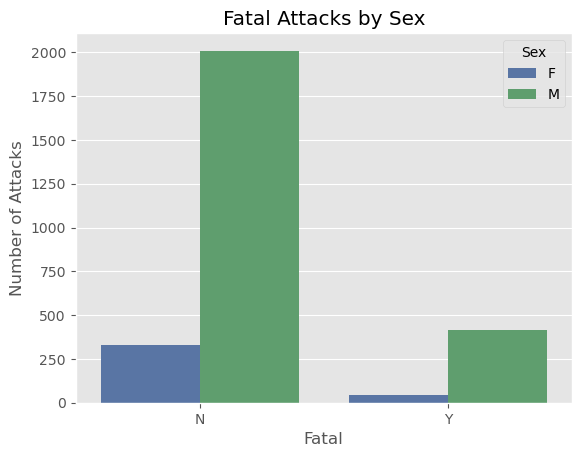

In [85]:
#Plotting to see which sex have the most fatal attacks
sns.countplot(x='fatal', hue='sex', data=shark_final)
plt.xlabel('Fatal')
plt.ylabel('Number of Attacks')
plt.title('Fatal Attacks by Sex')
plt.legend(title='Sex')
plt.show()


From the plot, we get that males are the sex that received the most fatal attacks. Maybe is because there are more men working at the sea, but we can not be sure of the reasons.

To get more insights on the hypothesis from before, we can plot the activities by sex, to delve further in the data.

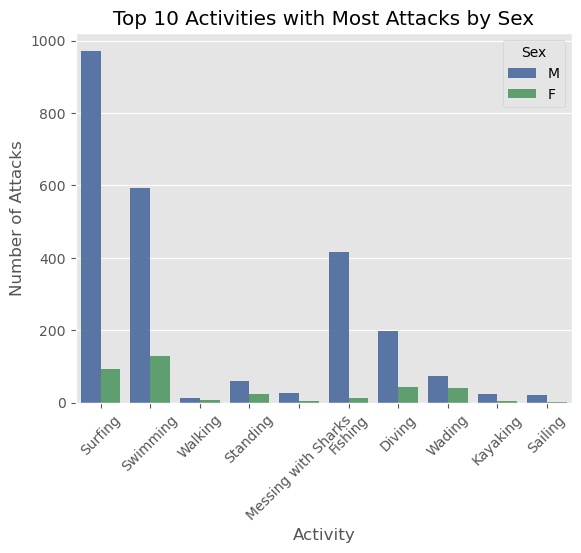

In [106]:
top_activities = sh_copy['activity'].value_counts().head(10).index
sns.countplot(x='activity', hue='sex', data=sh_copy[sh_copy['activity'].isin(top_activities)])
plt.xlabel('Activity')
plt.ylabel('Number of Attacks')
plt.title('Top 10 Activities with Most Attacks by Sex')
plt.legend(title='Sex')
plt.xticks(rotation=45)
plt.show()


And, as we imagined, men do more activities on the sea. Maybe it is because the dataset contains more information about men, but it is what the data tells us.

During which activity is most probable to receive a fatal attack from a shark?

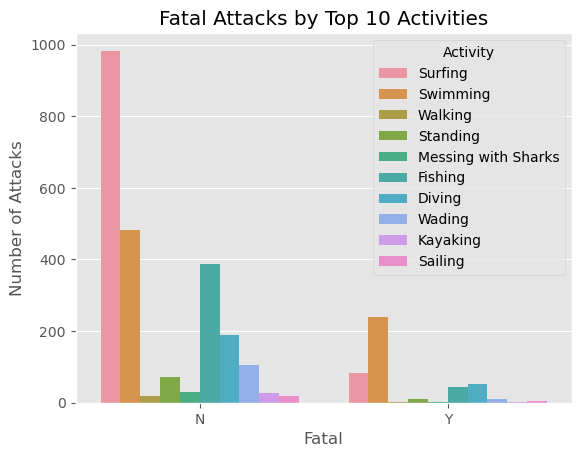

In [86]:
#Plotting to see which activity have the most fatal attacks
top_10_activities = shark_final['activity'].value_counts().head(10).index
sns.countplot(x='fatal', hue='activity', data=shark_final[shark_final['activity'].isin(top_10_activities)])
plt.xlabel('Fatal')
plt.ylabel('Number of Attacks')
plt.title('Fatal Attacks by Top 10 Activities')
plt.legend(title='Activity')
plt.show()


As we see, swimming is the activity that received the most fatal attacks, while surfing is the activity that suffered the most non fatal attacks.

Now, we will check which type has the most fatal attacks.

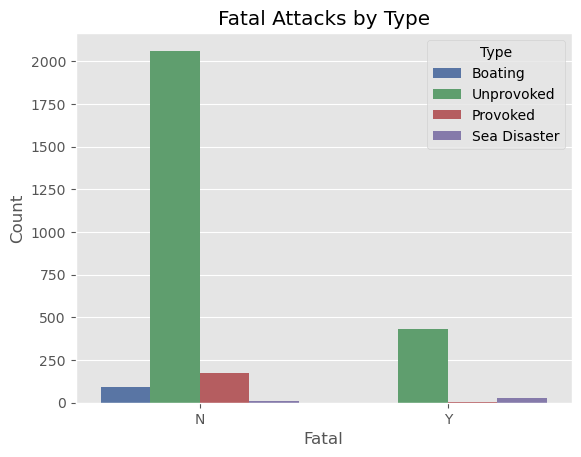

In [87]:
#Plotting to see which types have the most fatal attacks
sns.countplot(x='fatal', hue='type', data=shark_final)
plt.xlabel('Fatal')
plt.ylabel('Count')
plt.title('Fatal Attacks by Type')
plt.legend(title='Type')
plt.show()


AS we can see from the plot, there where more unprovoked attacks than from the others by a great margin. Also, it is th eone that has more fatal attacks.

We will also check which year had the most fatal attacks.

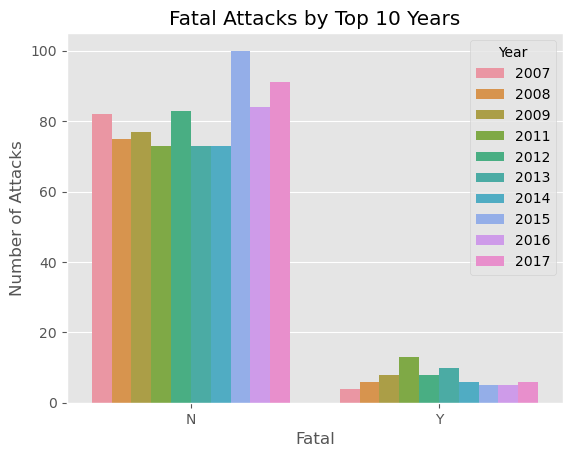

In [88]:
#Plotting to see which year have the most fatal attacks
top_10_years = shark_final['year'].value_counts().head(10).index
sns.countplot(x='fatal', hue='year', data=shark_final[shark_final['year'].isin(top_10_years)])
plt.xlabel('Fatal')
plt.ylabel('Number of Attacks')
plt.title('Fatal Attacks by Top 10 Years')
plt.legend(title='Year')
plt.show()


As we see, we only plotted the top 10 years, as we have a lot of data from a lot of years, but we have the most information on the years from 2000 onwards, maybe because the data collection was done more consistently than before. From those years, 2011 had the most fatal attacks.

Now we will check the fatal attacks by country.

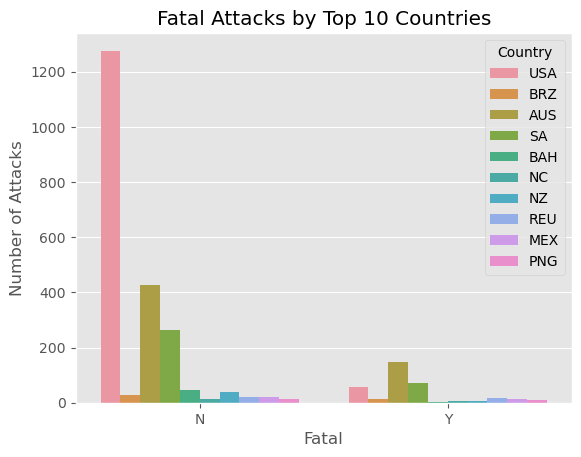

In [89]:
#Plotting to see which country have the most fatal attacks
top_10_countries = shark_final['country'].value_counts().head(10).index
sns.countplot(x='fatal', hue='country', data=shark_final[shark_final['country'].isin(top_10_countries)])
plt.xlabel('Fatal')
plt.ylabel('Number of Attacks')
plt.title('Fatal Attacks by Top 10 Countries')
plt.legend(title='Country')
plt.show()


Even though USA has the most attacks, it is Australia the one that has the most fatal attacks.

Just to check further on the previous information, we will check which species is more predominant in which country.

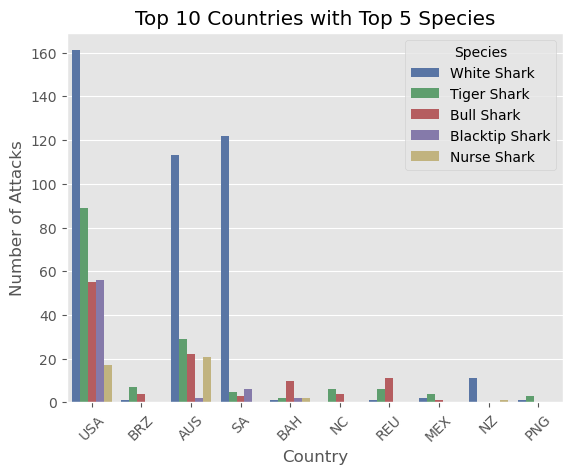

In [90]:
#Plotting the species with the country to see which one has the most pressence in each country.
top_10_species = shark_final[shark_final['species'] != 'Unknown Shark']['species'].value_counts().head(5).index
sns.countplot(x='country', hue='species', data=shark_final[shark_final['country'].isin(top_10_countries) & shark_final['species'].isin(top_10_species)])
plt.xlabel('Country')
plt.ylabel('Number of Attacks')
plt.title('Top 10 Countries with Top 5 Species')
plt.legend(title='Species')
plt.xticks(rotation=45)
plt.show()


From the plot, we get why Australia has the most fatal attacks, as it has mainly attacks by White Sharks, that are the ones whith the most fatal attacks. USA also has a lot of white sharks, so maybe it has to do with the activity.

I will plot the activity with the country, to delve a little bit further in the data.

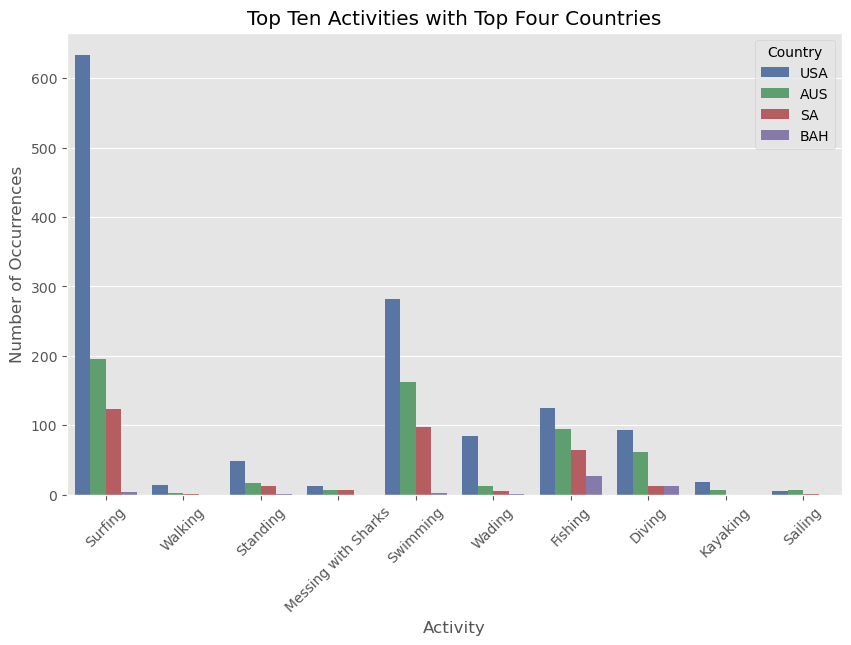

In [108]:
#Plotting the top ten activities with the top four countries to see which one has the most pressence in each country.
top_activities = shark_final['activity'].value_counts().head(10).index
top_countries = shark_final['country'].value_counts().head(4).index

shark_filtered = shark_final[shark_final['activity'].isin(top_activities) & shark_final['country'].isin(top_countries)]

plt.figure(figsize=(10, 6))
sns.countplot(x='activity', hue='country', data=shark_filtered)
plt.xlabel('Activity')
plt.ylabel('Number of Occurrences')
plt.title('Top Ten Activities with Top Four Countries')
plt.legend(title='Country')
plt.xticks(rotation=45)
plt.show()


From the plots, we can't get a lot of information, as USA continues to be the top socorer in the plots, maybe because we have more information on it.

From what we can see in the graphs, most of the fatal attacks were unprovoked, by white sharks and in Australia, even though USA has the most attacks. Also, by looking at the graphs, we see that in Australia white sharks are predominantly the main species, as they also are in USA an Samoa, by a great margin on the three. We can also see that most of the fatal attacks were perpetrated while the person was swimming.

And now, we will prepare the model to find out if an attack is more prone to be fatal or non fatal.

In [91]:
#Splitting the data
y = shark_final['fatal']
X = shark_final.drop('fatal', axis=1)

In [92]:
#Converting the categorical columns into dummies
X = pd.get_dummies(X)
X

,year,time,type_Boating,type_Provoked,type_Sea Disaster,type_Unprovoked,country_AND,country_ANT,country_ARG,country_AUS,...,species_Spurdog,species_Thresher shark,species_Tiger Shark,species_Unknown,species_Unknown Shark,species_Unknown Shark,species_Whaler Shark,species_White Shark,species_Wobbegong Shark,species_Zambesi Shark
0,2018,18,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,2018,7,False,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,2018,12,False,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,2018,17,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2018,14,False,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2792,1960,12,False,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2793,1960,12,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2794,1960,12,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2795,1943,12,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [93]:
#Checking the correlation of the columns with the target
pd.get_dummies(shark_final).corr()["fatal_Y"].sort_values()

fatal_N               -1.000000
year                  -0.347398
country_USA           -0.311000
activity_Surfing      -0.182734
type_Provoked         -0.104026
                         ...   
species_White Shark    0.111278
country_AUS            0.124296
type_Sea Disaster      0.172071
activity_Swimming      0.265848
fatal_Y                1.000000
Name: fatal_Y, Length: 224, dtype: float64

In [94]:
#checking the correlation of the columns with the target
pd.get_dummies(shark_final).corr()["fatal_N"].sort_values()

fatal_Y               -1.000000
activity_Swimming     -0.265848
type_Sea Disaster     -0.172071
country_AUS           -0.124296
species_White Shark   -0.111278
                         ...   
type_Provoked          0.104026
activity_Surfing       0.182734
country_USA            0.311000
year                   0.347398
fatal_N                1.000000
Name: fatal_N, Length: 224, dtype: float64

In [95]:
#Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
#Fiting the data into the model
classification = LogisticRegression(random_state=42)
classification.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [97]:
#Checking the score of the model
classification.score(X_test, y_test)

0.8642857142857143

In [98]:
#Checking the predictions of the model
predictions = classification.predict(X_test)
predictions

array(['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N',
       'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'Y',
       'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N

In [99]:
#Checking for imbalanced data
y_test.value_counts()

fatal
N    473
Y     87
Name: count, dtype: int64

In [100]:
#Checking the confusion matrix in percentages
predictions_ = classification.predict_proba(X_test)
predictions_

array([[0.90760722, 0.09239278],
       [0.98328525, 0.01671475],
       [0.68629045, 0.31370955],
       ...,
       [0.5301324 , 0.4698676 ],
       [0.83516391, 0.16483609],
       [0.96951294, 0.03048706]])

In [101]:
#Checking the confusion matrix
confusion_matrix(y_test, predictions)

array([[457,  16],
       [ 60,  27]], dtype=int64)

<Axes: >

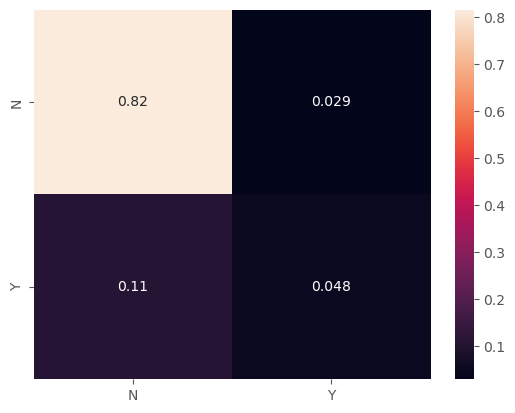

In [102]:
#Plotting the confusion matrix fir a more visual understanding
cf_matrix = confusion_matrix(y_test, predictions, normalize='all')
sns.heatmap(cf_matrix, annot=True, xticklabels=["N", "Y"], yticklabels=["N", "Y"])

As we can see from the results of the model, even though it is fairly precise, it's imbalaced towards N, as we have more data for N than Y. We can try and balance it a little bit to check for better results.

In [103]:
sampler = RandomOverSampler(random_state=42)
X_train_balanced, y_train_balanced = sampler.fit_resample(X_train, y_train) 
y_train_balanced.value_counts()

fatal
N    1865
Y    1865
Name: count, dtype: int64

In [104]:
classification = LogisticRegression(random_state=42) #, max_iter=1000
classification.fit(X_train_balanced, y_train_balanced)
classification.score(X_test, y_test)

0.7857142857142857

After balancing the model, we see that we have lost a little bit of accuracy.

<Axes: >

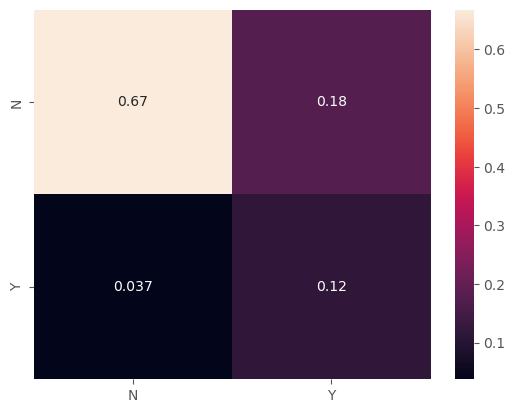

In [105]:
predictions = classification.predict(X_test)
cf_matrix = confusion_matrix(y_test, predictions, normalize='all')
sns.heatmap(cf_matrix, annot=True, xticklabels=["N", "Y"], yticklabels=["N", "Y"])

After the balancing, we can see that the predictions still favour the N values over the Y, but the Y values have augmented a little bit. 

In conclusion, we can say that there is more chances of a shark attack being non fatal than fatal.